# Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from TLE_ import*
from TLE_file import*

In [2]:
try:
    from sgp4.api import Satrec
    from sgp4.api import jday
except ImportError:
    print("Error: sgp4.api not found. Installing sgp4...")
    !pip3.12 install sgp4    

In [3]:
try:
    import requests
except ImportError as e:
    print("requests is not installed",e)
    !pip3.12 install requests
    !cls
    

# Live Data Retrieve from ISS

In [4]:
# URL = 'https://live.ariss.org/iss.txt'
# data = requests.get(URL)

# with open('TLE_ISS_Live.txt','w') as f:
#     for i in data.text.split('\n'):
#         f.write(i)

## Data Writing

In [5]:
TLE_objs = TLE_obj_from_file('TLE_ISS_Live.txt')
# TLE_objs = TLE_obj_from_file('TLE_database.txt')


for i in TLE_objs:
    print(i)


TLE data for ISS (ZARYA)
 
NORAD ID: 25544U
Epoch: 24137.32675451
Inclination: 51.6380
Right ascension of the ascending node: 113.3120
Eccentricity: 0003268
Argument of perigee: 173.0651
Mean anomaly: 328.3848
Mean motion: 15.51388706453606



In [9]:
sat = Satrec.twoline2rv(TLE_objs[0].line1, TLE_objs[0].line2)

jd, fr = jday(TLE_objs[0].time[1]['year'], TLE_objs[0].time[1]['month'], TLE_objs[0].time[1]['days'], TLE_objs[0].time[1]['hours'], TLE_objs[0].time[1]['minutes'], TLE_objs[0].time[1]['seconds'])
e, r, v = sat.sgp4(jd, fr)

print(e,r,v)

0 (-323.68347387618667, -5890.175745011806, 3318.1426544381347) (5.320651522500588, -2.9378146559949627, -4.707894267055596)


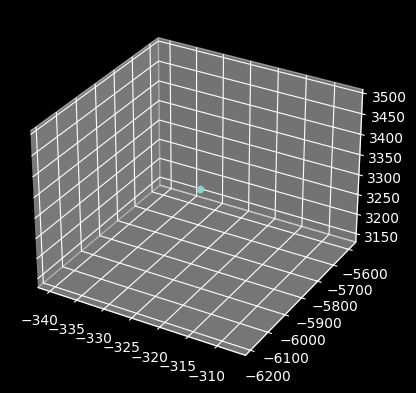

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(*r)